In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
column_names = ['hpso', 'simulation_type', 'time', 'graph', 'telescope', 'nodes', 'channels', 'data']

df = pd.read_csv('results_2023-04-29.csv',header=None,names=column_names)

# Need to transform data of each row into the form: 
# Telescope| experiment approach | time | with  data

# Isolate single HPSO01 and only pick 896 channels (although 512 doesn't appear to make a difference)
grouped_hpsos = df.groupby(["hpso", "channels"])
df_hpso01 = grouped_hpsos.get_group(("hpso01",896))

df_hpso_grouped_min = df_hpso01.groupby(["simulation_type", "graph", "data"], as_index=False).min()

# df_hpso = grouped_hpsos.get_group(("hpso01",896, "scatter", False))
xaxis = ["Parametric", "Workflow,\n Prototype", "Workflow,\n Prototype - Data", "Workflow,\n Scatter"]
df_hpso_grouped_min['xaxis'] = pd.Series(xaxis)

df_hpso_grouped_min

,simulation_type,graph,data,hpso,time,telescope,nodes,channels,xaxis
0,parametric,prototype,False,hpso01,32090,low-adjusted,896,896,Parametric
1,workflow,prototype,False,hpso01,30689,low-adjusted,896,896,"Workflow,\n Prototype"
2,workflow,prototype,True,hpso01,132812,low-adjusted,896,896,"Workflow,\n Prototype - Data"
3,workflow,scatter,False,hpso01,32133,low-adjusted,896,896,"Workflow,\n Scatter"


In [19]:
# grouped_hpsos = df.groupby(["hpso", "channels"])
df_hpso02 = grouped_hpsos.get_group(("hpso13",896))

df_hpso_grouped_min2 = df_hpso02.groupby(["simulation_type", "graph", "data"], as_index=False).min()

# df_hpso = grouped_hpsos.get_group(("hpso01",896, "scatter", False))
# xaxis = ["Parametric", "Workflow, Prototype", "Workflow, Prototype - Data", "Workflow, Scatter"]
df_hpso_grouped_min2['xaxis'] = pd.Series(xaxis)

df_hpso_grouped_min2

,simulation_type,graph,data,hpso,time,telescope,nodes,channels,xaxis
0,parametric,prototype,False,hpso13,5655,mid-adjusted,896,896,Parametric
1,workflow,prototype,False,hpso13,5284,mid-adjusted,896,896,"Workflow,\n Prototype"
2,workflow,prototype,True,hpso13,14371,mid-adjusted,896,896,"Workflow,\n Prototype - Data"
3,workflow,scatter,False,hpso13,5662,mid-adjusted,896,896,"Workflow,\n Scatter"


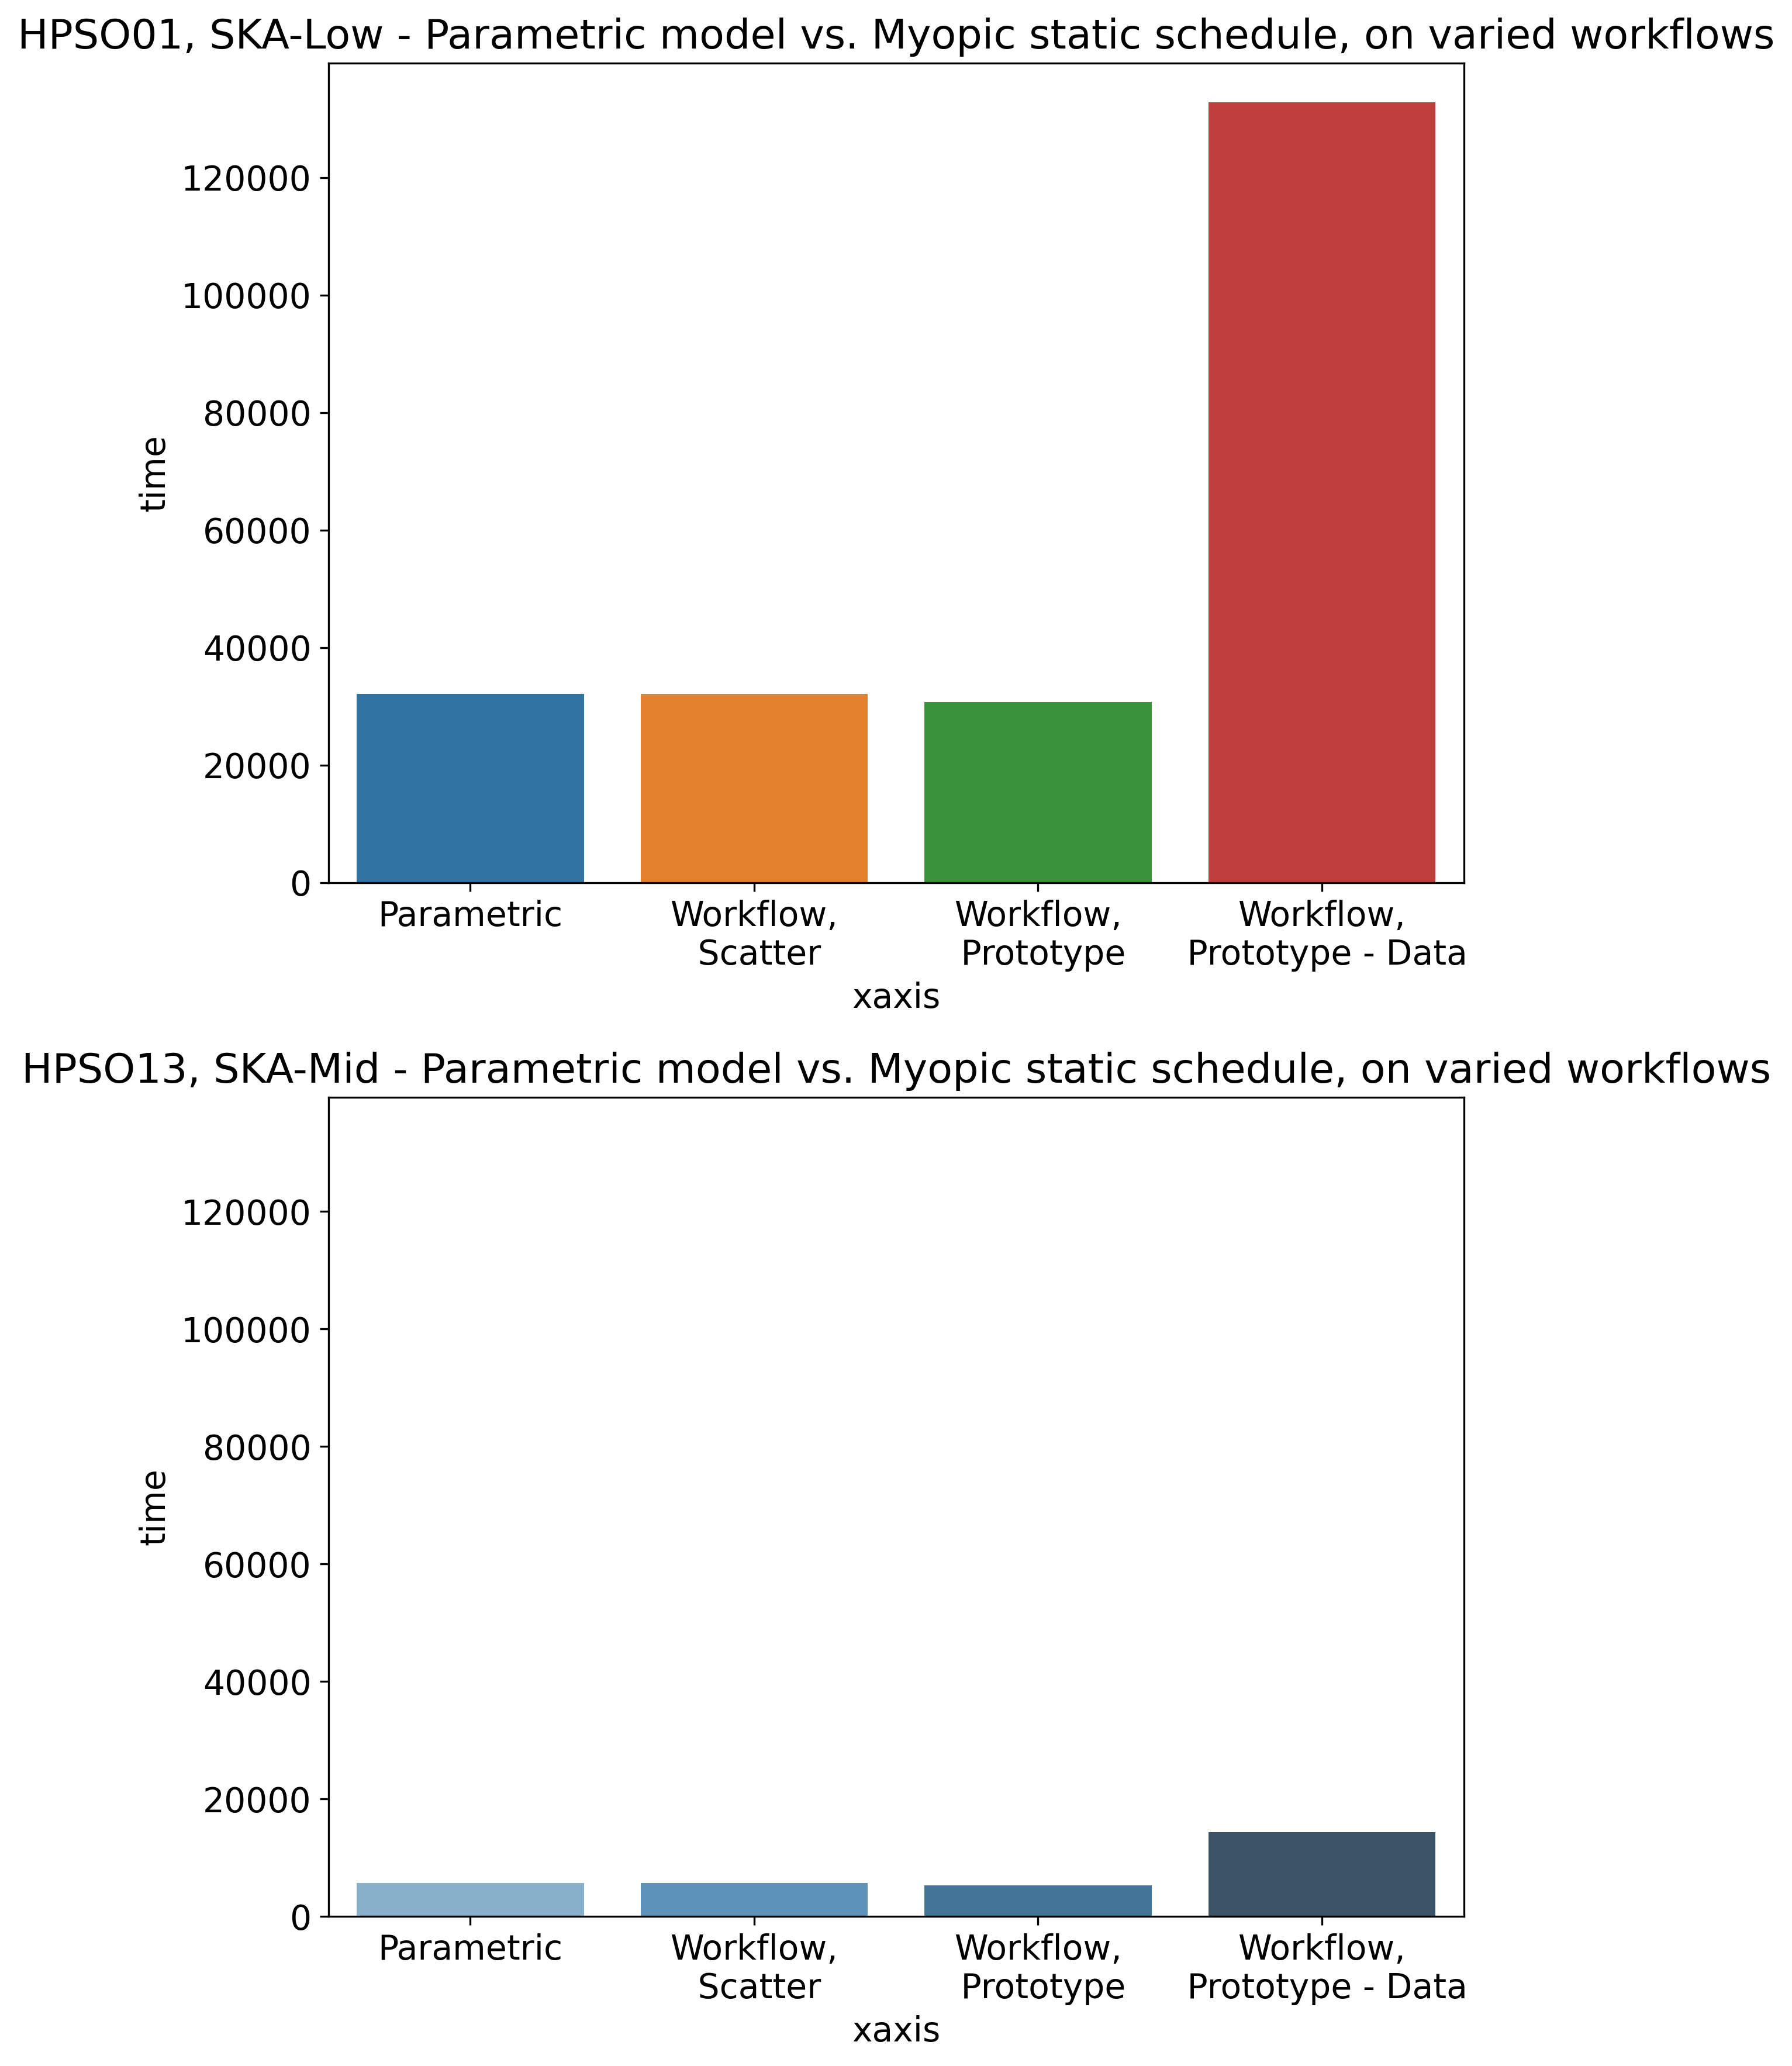

In [21]:
# f, ax = plt.subplots(figsize=(12,8))
plt.rcParams.update({'font.size': 14})
# f, ax = plt.subplots(figsize=(14,10),dpi=300)

# might want to restructure data so that we have simulation_type as parametric, scatter, prototype
f, ax = plt.subplots(ncols=1,nrows=2 ,figsize=(8,12), sharey=True, dpi=300, tight_layout=True)

# might want to restructure data so that we have simulation_type as parametric, scatter, prototype

g = sns.barplot(
    df_hpso_grouped_min, y='time', x='xaxis', order=[xaxis[0],xaxis[3],xaxis[1],xaxis[2]], ax=ax[0])
# g.set_yscale('log')
ax[0].set_title("HPSO01, SKA-Low - Parametric model vs. Myopic static schedule, on varied workflows")

g= sns.barplot(
    df_hpso_grouped_min2, y='time', x='xaxis', order=[xaxis[0],xaxis[3],xaxis[1],xaxis[2]], palette="Blues_d", ax=ax[1])
# g.set_yscale('log')
ax[1].set_title("HPSO13, SKA-Mid - Parametric model vs. Myopic static schedule, on varied workflows")
ax[1].tick_params(labelleft=True)
plt.savefig("SchedulingComparisons.png")